In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

In [79]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\Iris Flower - Iris.csv")
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [80]:
df.shape

(150, 6)

In [81]:
type(df)

pandas.core.frame.DataFrame

In [82]:
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [83]:
df = df.drop('Id', axis=1)  # Drops the column 'id'


In [84]:
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

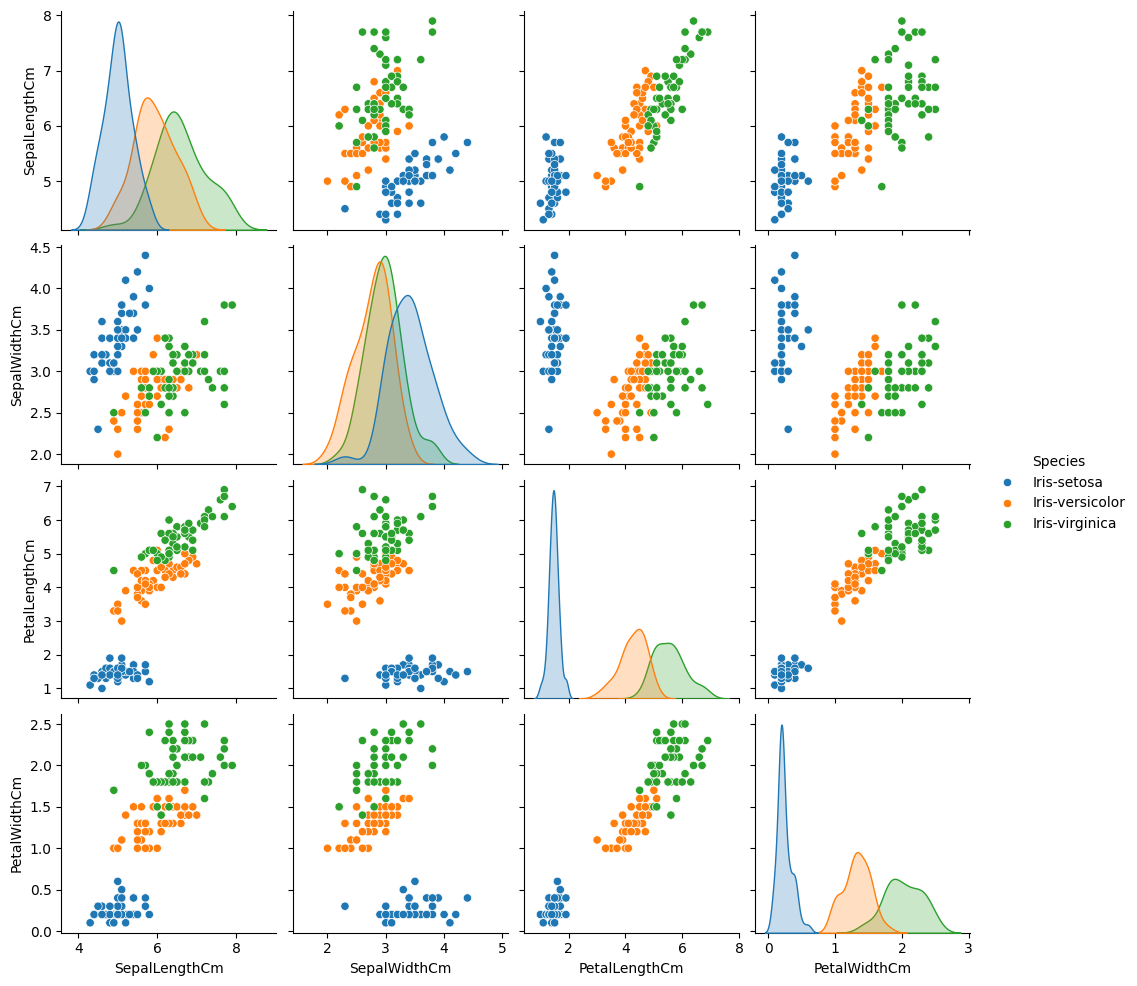

In [85]:
sns.pairplot(df,hue='Species') ## here hue is the color on which the three species is classified
plt.show()

In [86]:
## according tograph there is a considerable difference between their lengths 
### hence which can be helpful for their classification

In [87]:
## here x is used to represent the independent features all except species because it is dependent
x= df.drop("Species",axis=1)
print(x)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [88]:
y=df["Species"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [89]:
## split the dataset in train and test set
X_train,X_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=42)

In [90]:
X_train

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
81             5.5           2.4            3.7           1.0
133            6.3           2.8            5.1           1.5
137            6.4           3.1            5.5           1.8
75             6.6           3.0            4.4           1.4
109            7.2           3.6            6.1           2.5
..             ...           ...            ...           ...
71             6.1           2.8            4.0           1.3
106            4.9           2.5            4.5           1.7
14             5.8           4.0            1.2           0.2
92             5.8           2.6            4.0           1.2
102            7.1           3.0            5.9           2.1

[105 rows x 4 columns]

In [91]:
## n in the number of neighbours  refers to datapoint in the dataset
knn=KNeighborsClassifier(n_neighbors = 3 )
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [92]:
## evaluatoion of model
y_pred= knn.predict(X_test)

In [93]:
print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 1.0


In [94]:
## method dor evaluation of the model
print(classification_report(y_test,y_pred)) 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [95]:
## pdiction system
##5.1	3.5	1.4	0.2
new_data = pd.DataFrame({
    "SepalLengthCm": [6.7],
    "SepalWidthCm": [6.5],
    "PetalLengthCm": [3.4],
    "PetalWidthCm": [2.9]
})

 

In [97]:
##perfect prediction
prediction= knn.predict(new_data)
prediction[0]

'Iris-virginica'

In [98]:
import pickle
with open('iris_knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)
